In [28]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
AUTOTUNE = tf.data.experimental.AUTOTUNE
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [29]:
import pathlib

data_dir = pathlib.Path("DATA")

In [30]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

389

In [31]:
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"])
CLASS_NAMES

array(['D46D', 'F35', 'F36', 'G17', 'G43', 'I9', 'L1', 'L2', 'M17 ou T35',
       'oeil', 'S21', 'S34', 'Triangle'], dtype='<U10')

In [32]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

In [33]:
train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

Found 404 images belonging to 13 classes.


In [34]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

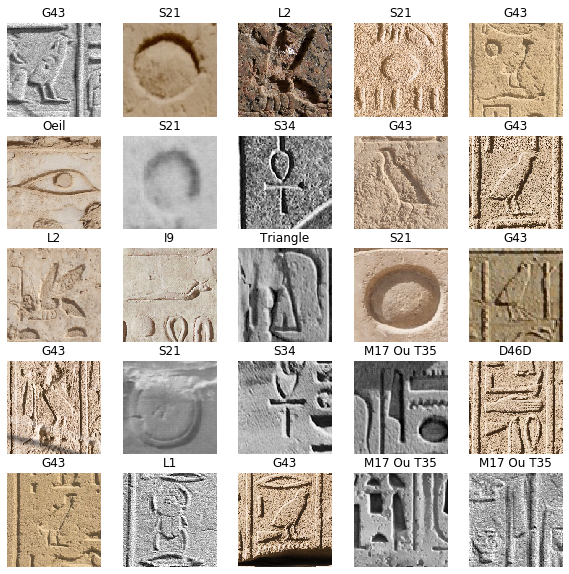

In [35]:
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

In [36]:
label = []
for item in label_batch:
    label.append(np.argmax(item))
label = np.array(label)

In [37]:
from sklearn.model_selection import train_test_split

(trainX, testX, trainY, testY) = train_test_split(image_batch, label, test_size=0.25)

In [38]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(13, activation='softmax'))

In [39]:
type(testY)

numpy.ndarray

In [40]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(trainX, trainY, epochs=12, 
                    validation_data=(testX, testY))

Train on 24 samples, validate on 8 samples
Epoch 1/12
24/24 [==============================] - 2s 66ms/sample - loss: 2.5182 - accuracy: 0.2083 - val_loss: 8.3079 - val_accuracy: 0.3750
Epoch 2/12
24/24 [==============================] - 1s 43ms/sample - loss: 8.7882 - accuracy: 0.2917 - val_loss: 7.7687 - val_accuracy: 0.0000e+00
Epoch 3/12
24/24 [==============================] - 1s 43ms/sample - loss: 5.0333 - accuracy: 0.0833 - val_loss: 5.0004 - val_accuracy: 0.0000e+00
Epoch 4/12
24/24 [==============================] - 1s 42ms/sample - loss: 3.2483 - accuracy: 0.1667 - val_loss: 3.1602 - val_accuracy: 0.0000e+00
Epoch 5/12
24/24 [==============================] - 1s 40ms/sample - loss: 2.3530 - accuracy: 0.2917 - val_loss: 2.0199 - val_accuracy: 0.3750
Epoch 6/12
24/24 [==============================] - 1s 40ms/sample - loss: 2.0003 - accuracy: 0.5417 - val_loss: 1.9967 - val_accuracy: 0.3750
Epoch 7/12
24/24 [==============================] - 1s 40ms/sample - loss: 1.8473 - acc

8/1 - 0s - loss: 2.4722 - accuracy: 0.3750


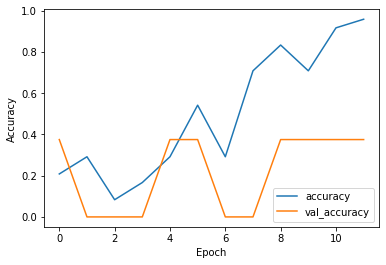

In [43]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(testX,  testY, verbose=2)

In [42]:
print(test_acc)

0.375
